# BE 521: Final Project Part 1
Spring 2025

Adapted by Kevin Xie

Updated by Zhongchuan Xu

32 Points

Objective: Predict finger movements from ECoG Recordings

Due: April 10th


## Important Deadlines
* Final Project Part 1 (Canvas)
 * Due: April 10th
 * 32 Points
* Team Registration
 * Due: April 10th
 * 5 Points
* Team Responsibilities (Canvas)
 * Due: April 14th
 * 3 Point
* Checkpoint 1, r > 0.33
 * Due: April 17th
 * 20 Points
* Checkpoint 2, r > 0.45
 * Due: April 24th
 * 15 Points
* End of competition, submit algorithm (Canvas):
 * Due: April 25th
 * 15 Points
* Final Report
 * Due: April 27th
 * 60 Points
* Competition results (Final class session)
 * On: April 30th

The grading is structured so that going the extra mile is definitely rewarded. We want you to show what you've learned this semester, and to have some fun!

## Writing Your Code
To get started with the final project we have provided a a series of method stubs for you to fill out. Your job for part 1 of the final project is to build a prediction pipeline that takes in the ECoG and dataglove finger angle recordings (serving as the data and labels respectively), then uses machine learning methods to generate predicted finger angles from the ECoG signals. The functions you will develop in this assignment are as follows:
* `get_windowed_feats` This function will take in raw ECoG data, and use the 2 following helper functions to filter the data, calculate sliding-window features.
 * `filter_data` This function will apply a filter to the raw data and return cleaned data
 * `get_features` This function will take in a window of cleaned data and return a vector of features for that window
* `create_R_matrix` This function will take in a feature matrix and return a response matrix as an adaptation of the optimal linear decoder method.



## Optimal Linear Decoder
You will use a modified version of the **optimal linear decoder** method as described in Warland et al., 1997. We will recapitulate the method in this section, but consult the paper for more details. Our ultimate goal is to predict the angle of each finger as it moves over time using data recorded from the ECoG channels.

The position data is captured for 300 seconds, which you will split up into $M$ total time bins, and the number of ECoG channels, $\nu$, is 61, 46, and 64 for subject 1, 2, and 3 respectively.

The paradigm we adapt here tries to predict finger angle at a given time window using ECoG features calculated over the preceding $N$ time windows, using
the following steps:

First, $p$ features will be calculated across all $\nu$ ECoG channels over $M$ total time windows to get a feature matrix of shape $\bigl(M, (\nu \times p)\bigr)$

Then, following the approach that Warland et al., 1997 takes, we will construct a row vector corresponding to each time bin, that contains features for all the ECoG channels over the preceding *N* time bins (in the paper, spike counts are their features and they index neurons instead of ECoG channels). Thus, there will be a good amount of redundancy between row vectors of adjacent time bins, but that is okay.

Let $r^{c,\phi}_t$ be the value of the feature in window $t \in \{1,2,\dots,M\}$, channel $c\in\{1,2,\dots,\nu\}$ and with feature $\phi\in\{1,2,\dots,p\}$. Let the response matrix $R \in \mathbb{R}^{M \times (1+N \cdot p \cdot \nu )}$ be defined as:

$$R = \begin{bmatrix}
\mathbf{1} & r^{(1,1)}_1 & r^{(1,1)}_1 & \cdots & r^{(1,1)}_1 & r^{(1,1)}_1 & r^{(1,2)}_1 & \cdots & r^{(1,2)}_1 & \cdots & r^{(\nu,p)}_1 & \cdots & r^{(\nu,p)}_1\\
\mathbf{1} & r^{(1,1)}_1 & r^{(1,1)}_1 & \cdots & r^{(1,1)}_1 & r^{(1,1)}_2 & r^{(1,2)}_1 & \cdots & r^{(1,2)}_2 & \cdots & r^{(\nu,p)}_1 & \cdots & r^{(\nu,p)}_2\\
\mathbf{1} & r^{(1,1)}_1 & r^{(1,1)}_1 & \cdots & r^{(1,1)}_2 & r^{(1,1)}_3 & r^{(1,2)}_1 & \cdots & r^{(1,2)}_3 & \cdots & r^{(\nu,p)}_1 & \cdots & r^{(\nu,p)}_3\\
\vdots   & \vdots     & \vdots     & \ddots & \vdots     & \vdots     & \vdots     & \ddots & \vdots   & \cdots & \vdots         & \ddots & \vdots\\
\mathbf{1} & r^{(1,1)}_1 & r^{(1,1)}_2 & \cdots & r^{(1,1)}_{N-1} & r^{(1,1)}_N & r^{(1,2)}_1 & \cdots & r^{(1,2)}_N & \cdots & r^{(\nu,p)}_1 & \cdots & r^{(\nu,p)}_N\\
\mathbf{1} & r^{(1,1)}_2 & r^{(1,1)}_3 & \cdots &r^{(1,1)}_{N} & r^{(1,1)}_{N+1} & r^{(1,2)}_2 & \cdots & r^{(1,2)}_{N+1} & \cdots & r^{(\nu,p)}_2 & \cdots & r^{(\nu,p)}_{N+1}\\
\vdots   & \vdots     & \vdots     & \ddots & \vdots     & \vdots     & \vdots     & \ddots & \vdots   & \cdots & \vdots         & \ddots & \vdots\\
\mathbf{1} & r^{(1,1)}_{M-N+1} & r^{(1,1)}_{M-N+2} & \cdots & r^{(1,1)}_{M-1} & r^{(1,1)}_M & r^{(1,2)}_{M-N+1} & \cdots & r^{(1,2)}_M & \cdots & r^{(\nu,p)}_{M-N+1} & \cdots & r^{(\nu,p)}_M\\
\end{bmatrix}$$



This is also referred to as the design or feature matrix, with each column being a predictor, or feature. The column of 1’s accounts for the intercept term in linear regression/decoding. Here we are repeating the first windows $N-1$ times as the padding of the first windows. Make sure you understand what this matrix means before moving on.

We denote the target matrix as $Y \in \mathbb{R}^{M \times 5}$ and the prediction matrix (e.g. the predicted finger angles) as $\hat{Y} \in \mathbb{R}^{M \times 5}$. Note that in Warland et al., 1997, this quantity is referred to as the stimulus vector since they are talking about decoding the stimulus from neural data after it. We, on the other hand, are trying to decode finger positions using the ECoG data before it, but we can conveniently use the same method. Our goal is to find some optimal weight matrix or filter $f \in \mathbb{R}^{(1+N \cdot p \cdot \nu ) \times 5}$ that minimizes the mean squared error:

$$f^* = \operatorname{argmin}_{f} \, \mathcal{L}(f) = \operatorname{argmin}_{f} \left\|Y - \hat{Y}\right\|^2,$$
where $\hat{Y} = Rf$

We start with the mean squared error (MSE) loss function:
$$
\mathcal{L}(f) = \left\|Y - R\,f\right\|^2 = (Y - R\,f)^\top (Y - R\,f)
$$

To minimize the loss, we take the derivative with respect to the weight matrix $f$ and set it equal to zero:
$$
\frac{\partial \mathcal{L}}{\partial f} = -2\,R^\top (Y - R\,f) = 0
$$

This implies:
$$
R^\top Y = R^\top R\,f
$$

Assuming that $R^\top R$ is invertible, we solve for $f$:
$$
f = \left(R^\top R\right)^{-1} R^\top Y
$$

This is the the analytic form for the optimal filter $f$ that minimizes the MSE loss.

This equation should take a familiar form. Warland et al., 1997 don’t refer to it as such, but this is exactly the same as linear regression, one of the most commonly used algorithms in practical machine learning. Not only is this algorithm remarkably powerful, but it has a beautiful analytic form for learning the “weights” (here, the $f$ matrix), a rarity in a field where almost all optimizations involve some sort of iterative algorithm. After learning the filter weights $f$, we can calculate the optimal predictions as: $$\hat{Y} = Rf$$

## Dataset
The dataset for part 1 is stored within `final_proj_part1_data.pkl`. The `.pkl` file type is a pickle file, which stores python objects. You can open the `.pkl` file with this code.
```
with open('final_proj_part1_data.pkl', 'rb') as f:
  proj_data = pickle.load(f)
```
This stores the data inside the file as a variable named proj_data.

**NOTE: Python versions don't pickle with each other very well. This pickle file was made in Google Colab. If you are running your own installation of Python and cannot load the file, we recommend you use Colab**

There are 3 subjects, each with their own Data Glove data (the glove they used to capture hand movements), and ECoG data. The data is represented as a dictionary with keys `'data_glove'` and `'ecog'`, storing the data glove and ecog data, respectively. These keys map to python lists of 3 items. Each item is an np.ndarray corresponding to a subject's data. See the pseudcode below.

```
proj_data = {
  'data_glove':[np.ndarray for subject 1, np.ndarray for subject 2, np.ndarray for subject 3],
  'ecog':[np.ndarray for subject 1, np.ndarray for subject 2, np.ndarray for subject 3]
}
```

All np.ndarray shapes for `'data_glove'` should be $(T,5)$, where $T$ is the number of samples in the signal, and 5 is the number of fingers.

The np.ndarray shapes for `'ecog'` are $(T, 61)$, $(T, 46)$, and $(T,64)$, where T is the number of samples in the signal, and each subject had 61, 46, and 64 ecog channels, respectively.

**The sampling rate of the data glove and ecog was 1000 Hz**

<!-- The dataset is also on IEEG
* Subject 1
 * I521_Sub1_Training_ecog - Training ECoG \
 * I521_Sub1_Training_dg - Training Data Glove \
 * I521_Sub1_Leaderboard_ecog - Testing ECoG
* Subject 2
 * I521_Sub2_Training_ecog - Training ECoG \
 * I521_Sub2_Training_dg - Training Data Glove \
 * I521_Sub2_Leaderboard_ecog - Testing ECoG
* Subject 3
 * I521_Sub3_Training_ecog - Training ECoG \
 * I521_Sub3_Training_dg - Training Data Glove \
 * I521_Sub3_Leaderboard_ecog - Testing ECoG -->

Your task is to develop an algorithm to use the ECoG to predict finger movements that are captured by the Data Glove.

In [4]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import pearsonr
from scipy import signal as sig

In [5]:
train_file = 'raw_training_data.mat' # file path
test_file = 'leaderboard_data.mat'

# load training data
train_data = sio.loadmat(train_file) # returns dict with keys and values as numpy arrays
ecog = train_data['train_ecog']
data_glove = train_data['train_dg']

# leaderboard testing data
test_data = sio.loadmat(test_file)
leaderboard_ecog = test_data['leaderboard_ecog']

In [6]:
train_ecog = []
test_ecog = []
train_glove = []
test_glove = []

train_len = int(0.8*len(ecog[0][0]))

for subject_idx in range(3):
    ecog_data = ecog[subject_idx]
    glove_data = data_glove[subject_idx]
    train_ecog.append(ecog_data[0][:train_len])
    test_ecog.append(ecog_data[0][train_len:])
    train_glove.append(glove_data[0][:train_len])
    test_glove.append(glove_data[0][train_len:])

In [7]:
def filter_data(raw_eeg, fs=1000):
  """
  Write a filter function to clean underlying data.
  Filter type and parameters are up to you. Points will be awarded for reasonable filter type, parameters and application.
  Please note there are many acceptable answers, but make sure you aren't throwing out crucial data or adversly
  distorting the underlying data!

  Input:
    raw_eeg (samples x channels): the raw signal
    fs: the sampling rate (1000 for this dataset)
  Output:
    clean_data (samples x channels): the filtered signal
  """
  def notch_filter(data, freq, fs, Q=30):
      """Apply a notch filter at a specific frequency."""
      b, a = sig.iirnotch(w0=freq/(fs/2), Q=Q)
      return sig.filtfilt(b, a, data, axis=0)

  def bandpass_filter(data, lowcut, highcut, fs, order=4):
      """Apply a Butterworth bandpass filter."""
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = sig.butter(order, [low, high], btype='band')
      return sig.filtfilt(b, a, data, axis=0)

    # Apply notch filters at 60 Hz harmonics (up to 300 Hz)
  filtered = raw_eeg.copy()
  for freq in [60, 120, 180, 240, 300]:
      filtered = notch_filter(filtered, freq, fs)

    # Apply bandpass filter (default 1–200 Hz)
  clean_data = bandpass_filter(filtered, lowcut=1, highcut=200, fs=fs)

  return clean_data

In [8]:
#Your code here
train_ecog_0 = train_ecog[0][0]

In [9]:
train_ecog[2][0]

array([ 1888,  -915,   260,  -600,  -723,  -746,   825,  1925,  3013,
       -2395, -1195, -1129,   776,   567,  1906,   941, -1909,  1785,
        2219,   871,   230,  -600,  2919,  1129,  -956,  1911,   442,
       -1527,  -226,  1150,  -129,  1301,  -785,  -933,  -160,   141,
        2327,  1556,  -174,     8,   619,  -125,   128, -1932,   920,
         423,    98,    -7,   884,   440,   234,  -442,   652,  2631,
         550,  1812,   686,   717,   467,  1699, -1043, -2160,  1388,
        -335], dtype=int32)

In [10]:
filtered_0 = filter_data(train_ecog[0][0])

In [11]:
train_ecog_0

array([  612, -1490,  -996,  -678,  1346,   504,   940,  -977,  2456,
        -334,  3114,   528,  -930,   439,  1203,   379,   190,   617,
         748,  2762, -1650,  -326, -2523,  1398, -2233, -1023,  -721,
       -2708,   -92,  3271,   991,   484,  2720,  4723,   417,  -307,
         823,  2762, -1673, -3079, -2541, -1259,   473,  -937, -4102,
         971, -1402,  1631,  3424, -1880,  1360,   704, -2611, -2691,
        -780, -3169,   211,  -921,  1142,   205,  1046,  -214],
      dtype=int32)

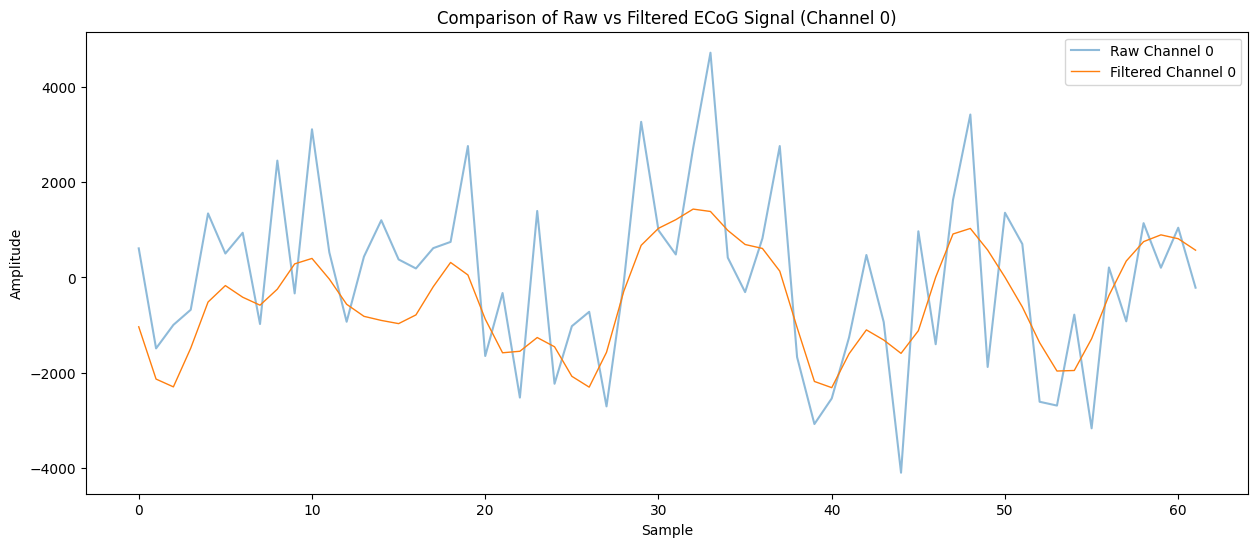

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(train_ecog_0, label='Raw Channel 0', alpha=0.5)
plt.plot(filtered_0, label='Filtered Channel 0', linewidth=1)
plt.title('Comparison of Raw vs Filtered ECoG Signal (Channel 0)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

I used a filter frequency of 1-200 Hz for the bandpass filter and a notch filter at 60Hz harmonics up to 300 Hz.

# 2. Calculating Features (12 points)

Here you will complete the `get_windowed_feats` and `get_features` functions.

## 1.
We will calculate features across sliding time windows. if we use a suggested window length of 100ms with a 50ms window overlap, how many feature windows, $M$, will we have if we computed features using all the data in a given subject? Feel free to re-use code from previous homeworks.

In [13]:
fs = 1000
xLen = len(train_ecog[0])

In [14]:
#Your code here
winLen= 0.1
winDisp = 0.05

def NumWins(xLen, fs, winLen, winDisp):
  winLen = winLen * fs
  winDisp = winDisp * fs
  return int((xLen - winLen) // winDisp + 1)

In [15]:
NumWins(xLen, fs, winLen, winDisp)

4799

In [16]:
def moving_win_feats(x, fs, winLen, winDisp, featFn):
  numWins = NumWins(len(x), fs, winLen, winDisp)
  winLen = winLen * fs
  winDisp = winDisp * fs
  feature_values = np.zeros(int(numWins))
  for i in range(int(numWins)):
    start = int(i * winDisp)
    end = int(start + winLen)
    feature_values[i] = featFn(x[start:end])
  return feature_values

In [17]:
from scipy.stats import skew, kurtosis
def bandpower(data, fs, fmin, fmax):
      f, Pxx = sig.welch(data, fs=fs, nperseg=min(256, len(data)), nfft=1024)
      band = (f >= fmin) & (f <= fmax)
      return np.trapz(Pxx[band], f[band])

def get_features(filtered_window, fs=1000):
  """
    Write a function that calculates features for a given filtered window.
    Feel free to use features you have seen before in this class, features that
    have been used in the literature, or design your own!

    Input:
      filtered_window (window_samples x channels): the window of the filtered ecog signal
      fs: sampling rate
    Output:
      features (channels x num_features): the features calculated on each channel for the window
  """
  
  window_samples, num_channels = filtered_window.shape
  num_features = 6
  features = np.zeros((num_channels, num_features))

  for ch in range(num_channels):
      signal = filtered_window[:, ch]
      features[ch, 0] = np.mean(signal)                        # average
      # commented out a couple of features because I wanted to keep it the same as the paper for now but will uncomment out for the future trials
      # features[ch, 1] = np.std(signal)                         # STD
      # features[ch, 2] = skew(signal)                           # Skewness
      # features[ch, 3] = kurtosis(signal)                       # Kurtosis
      features[ch, 1] = bandpower(signal, fs, 5, 15)           # Mu band
      features[ch, 2] = bandpower(signal, fs, 20, 25)          # Beta band
      features[ch, 3] = bandpower(signal, fs, 75, 115)         # High gamma
      features[ch, 4] = bandpower(signal, fs, 125, 160)        # Upper high gamma
      features[ch, 5] = bandpower(signal, fs, 160, 175)
  return features

In [18]:
def get_windowed_feats(raw_ecog, fs, window_length, window_overlap):
  """
    Write a function which processes data through the steps of filtering and
    feature calculation and returns features. Points will be awarded for completing
    each step appropriately (note that if one of the functions you call within this script
    returns a bad output, you won't be double penalized). Note that you will need
    to run the filter_data and get_features functions within this function.

    Inputs:
      raw_eeg (samples x channels): the raw signal
      fs: the sampling rate (1000 for this dataset)
      window_length: in seconds
      window_overlap: in seconds
    Output:
      all_feats (num_windows x (channels x features)): the features for each channel for each time window
        note that this is a 2D array.
  """
  filtered = filter_data(raw_ecog, fs)

  window_length = int(window_length * fs)
  window_overlap = int(window_overlap * fs)

  step = window_length - window_overlap
  num_samples, _ = filtered.shape
  starts = np.arange(0, num_samples - window_length + 1, step)

  all_feats = []

  for start in starts:
      end = start + window_length
      window = filtered[start:end, :]
      feats = get_features(window, fs)
      all_feats.append(feats.flatten())

  return np.array(all_feats)

In [19]:
#Your code here
Num_columns = 62 * 6 * 3 + 1
print(Num_columns)

1117


The size of our matrix would be 5999 x 1117. 

In [20]:
def create_R_matrix(features, N_wind):
  """
  Write a function to calculate the R matrix

  Input:
    features (num_windows x (channels x features)):
      the features you calculated using get_windowed_feats
    N_wind: number of windows to use in the R matrix

  Output:
    R (samples x (N_wind*channels*features))
  """
  M, D = features.shape

  padding = np.repeat(features[[0]], repeats=N_wind - 1, axis=0)  # shape: (N-1, D)
  padded_feats = np.vstack((padding, features))  # shape: (M + N - 1, D)

  R = np.zeros((M, N_wind * D))

  for i in range(M):
      window = padded_feats[i:i + N_wind, :]
      R[i, :] = window.flatten(order='C')
  bias = np.ones((M, 1))
  R = np.hstack((bias, R))
  return R

In [21]:
train_ecog[0]

array([[  612, -1490,  -996, ...,   205,  1046,  -214],
       [  814, -1367,  -649, ...,   399,  1241,   -71],
       [ 1111, -1182,  -318, ...,   642,  1459,    64],
       ...,
       [  803,   845,  -998, ...,  2462,  1948,  -142],
       [  828,   706, -1034, ...,  2443,  2039,    36],
       [ 1038,   646, -1001, ...,  2554,  2146,   450]],
      shape=(240000, 62), dtype=int32)

In [22]:
train_ecog = train_ecog

In [23]:
test_ecog = test_ecog

In [24]:
#Your code here
def compute_linear_filter(R, finger_flexion_raw, original_fs=1000, window_step=50):

    M = R.shape[0]
    T = finger_flexion_raw.shape[0]
    Y = sig.resample(finger_flexion_raw, len(R))

    alpha = 0
    RTR = R.T @ R + alpha * np.eye(R.shape[1])
    return np.linalg.inv(RTR) @ (R.T @ Y)

In [25]:
train_feats_1 = [get_windowed_feats(train_ecog_thing, fs=1000, window_length=0.1, window_overlap=0.05) for train_ecog_thing in train_ecog]
test_feats_2 = [get_windowed_feats(test_ecog_thing, fs=1000, window_length=0.1, window_overlap=0.05) for test_ecog_thing in test_ecog]
    

/var/folders/fq/t46mbxyj54j1d9t60j44v_j80000gn/T/ipykernel_35093/3204606161.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(Pxx[band], f[band])


In [26]:
# test ecog r matrix
R_train = [create_R_matrix(train_feats_thing, N_wind=3) for train_feats_thing in train_feats_1]
R_test = [create_R_matrix(test_feats_thing, N_wind=3) for test_feats_thing in test_feats_2]

In [27]:
R_train[0]

array([[ 1.00000000e+00, -1.53937304e+03,  8.21380044e+05, ...,
         4.98260809e+04,  2.08469215e+03,  2.37062320e+02],
       [ 1.00000000e+00, -1.53937304e+03,  8.21380044e+05, ...,
         1.34536203e+05,  6.62685424e+03,  1.22717247e+03],
       [ 1.00000000e+00, -1.53937304e+03,  8.21380044e+05, ...,
         1.10030791e+04,  1.23692031e+03,  1.04805364e+02],
       ...,
       [ 1.00000000e+00,  9.32495615e+02,  6.96643655e+05, ...,
         5.41933922e+04,  4.92034764e+03,  3.27958144e+02],
       [ 1.00000000e+00,  2.59494267e+03,  1.26186349e+06, ...,
         3.78902539e+04,  6.35052573e+03,  4.86639613e+02],
       [ 1.00000000e+00,  1.88911968e+02,  8.94261071e+05, ...,
         2.81813299e+04,  6.47496745e+02,  2.66376028e+02]],
      shape=(4799, 1117))

In [28]:
f = [compute_linear_filter(R_train_thing, train_glove_thing) for R_train_thing, train_glove_thing in zip(R_train, train_glove)]

## 2.
Try one other machine learning models using your features and finger angle labels. Look back through previous homeworks to get some ideas

Ridge Regression

In [29]:
#your code here
from sklearn.linear_model import Ridge

def train_ridge_model(R, Y, alpha=1.0):
    model = Ridge(alpha=alpha)
    model.fit(R, Y)
    return model

Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

def train_rf_model(R, Y):
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(R, Y)
    return model


Multi-layer perceptron

In [31]:
from sklearn.neural_network import MLPRegressor

def train_mlp_model(R, Y):
    model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu',
                         solver='adam', max_iter=500, random_state=42)
    model.fit(R, Y)
    return model

## 3.
Produce predictions on the testing set for each finger angle.

Report your correlations here using the linear filter, and when using the other model(s) that you tried, as follows:

> For each subject, calculate the correlation coefficient between the predicted and test finger angles for each finger separately.

> You therefore should have 15 correlations: five per subject, with three subjects.

You will find  [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) to be helpful and already imported.

In [32]:
R_test[0]

array([[ 1.00000000e+00, -8.68735103e+02,  1.61426597e+05, ...,
         2.39769768e+04,  1.01962158e+03,  1.04673156e+03],
       [ 1.00000000e+00, -8.68735103e+02,  1.61426597e+05, ...,
         3.60743780e+04,  4.06327923e+03,  1.98274407e+02],
       [ 1.00000000e+00, -8.68735103e+02,  1.61426597e+05, ...,
         4.98071558e+04,  2.41475242e+03,  4.13035742e+02],
       ...,
       [ 1.00000000e+00,  1.13040414e+03,  1.21826837e+06, ...,
         1.55022694e+04,  1.75086120e+03,  3.57134596e+02],
       [ 1.00000000e+00,  1.19604942e+02,  9.04437719e+04, ...,
         1.07488671e+04,  3.27297839e+03,  3.12071365e+02],
       [ 1.00000000e+00, -3.69065640e+02,  1.74054634e+06, ...,
         2.11983655e+04,  1.19186963e+03,  6.60259306e+01]],
      shape=(1199, 1117))

In [33]:
f[0]

array([[-1.55525231e-01, -1.78121121e-01,  1.57537929e-01,
        -4.00798991e-01, -4.23502009e-01],
       [-6.56835193e-05,  7.31426699e-05,  7.86627244e-05,
         7.70685442e-06, -1.21451993e-05],
       [-4.88882833e-08,  1.05930788e-07,  1.43214920e-07,
         3.52799704e-09, -4.26493728e-08],
       ...,
       [ 1.36887329e-06, -8.79661863e-08, -1.30757562e-06,
         1.18787257e-06,  1.50106945e-06],
       [ 2.84918626e-06, -9.60589285e-06, -8.70543058e-06,
        -1.38168740e-06, -3.28272488e-06],
       [-3.49285502e-05,  4.00685679e-05,  6.22632591e-05,
         2.04332348e-05, -1.90183290e-05]], shape=(1117, 5))

In [34]:
R_test[0] @ f[0]

array([[ 1.20781857,  0.10366324,  0.88204698, -0.18055179, -0.1756931 ],
       [ 1.1155405 ,  0.30926899,  1.02664012,  0.22421409,  0.08267142],
       [ 0.70110762, -0.15862184, -0.23199374, -0.17211381, -0.17125933],
       ...,
       [-0.33455805, -0.15640174,  1.21882785, -0.40785141, -1.18938136],
       [ 0.17503925, -0.73276373,  0.90861255, -0.59114404, -1.50544398],
       [ 0.48268757,  0.18865125, -0.03904754, -1.03035425, -0.47835258]],
      shape=(1199, 5))

In [35]:
test_glove[0]

array([[ 3.81389046, -0.24837303, -0.23643494, -0.27740097,  0.46798992],
       [ 3.81389046, -0.24837303, -0.23643494, -0.27740097,  0.46798992],
       [ 3.81389046, -0.24837303, -0.23643494, -0.27740097,  0.46798992],
       ...,
       [ 2.0240593 , -0.35267067, -0.19278526, -0.19677258, -0.27182388],
       [ 2.00303459, -0.35165787, -0.19276047, -0.19695473, -0.27204323],
       [ 1.98193359, -0.3506403 , -0.19273472, -0.19713593, -0.27226353]],
      shape=(60000, 5))

In [36]:
fingers = np.array([0, 1, 2, 4])

In [37]:
#Your code here
# this is the first part for the method described in the paper
correlations = []

for subject_idx in range(3):
    R_test_subject = R_test[subject_idx]
    test_glove_subject = test_glove[subject_idx]

    downsampled_glove = sig.resample(test_glove_subject, len(R_test_subject))
    print(len(downsampled_glove))
    Y_pred =  R_test_subject @ f[subject_idx]
    
    finger_correlations = []
    for finger_idx in range(5):
        r, _ = pearsonr(Y_pred[:, finger_idx], downsampled_glove[:, finger_idx])
        finger_correlations.append(r)
    
    correlations.append(finger_correlations)
    print(f"\nSubject {subject_idx + 1} finger correlations:")
    for finger, r in enumerate(finger_correlations):
        print(f"Finger {finger + 1}: {r:.3f}")

correlations_np = np.array(correlations)
avg_wout_4th_finger = np.mean(correlations_np[:, fingers])
avg_correlation = np.mean(correlations_np)
print(f"\nAverage correlation across all subjects and fingers: {avg_correlation:.3f}")
print(f"\nAverage correlation without 4th finger: {avg_wout_4th_finger:.3f}")

1199

Subject 1 finger correlations:
Finger 1: 0.432
Finger 2: 0.533
Finger 3: 0.129
Finger 4: 0.457
Finger 5: -0.048
1199

Subject 2 finger correlations:
Finger 1: 0.348
Finger 2: 0.260
Finger 3: 0.155
Finger 4: 0.495
Finger 5: 0.201
1199

Subject 3 finger correlations:
Finger 1: 0.535
Finger 2: 0.373
Finger 3: 0.500
Finger 4: 0.513
Finger 5: 0.455

Average correlation across all subjects and fingers: 0.356

Average correlation without 4th finger: 0.323


Using the linear filter model described in the paper, the average correlation that I got was 0.356 (I did a training, test split of 80, 20). This is not the worst, but I will try to do a bit better using the other models that I had above. 

In [38]:
R_train[0]

array([[ 1.00000000e+00, -1.53937304e+03,  8.21380044e+05, ...,
         4.98260809e+04,  2.08469215e+03,  2.37062320e+02],
       [ 1.00000000e+00, -1.53937304e+03,  8.21380044e+05, ...,
         1.34536203e+05,  6.62685424e+03,  1.22717247e+03],
       [ 1.00000000e+00, -1.53937304e+03,  8.21380044e+05, ...,
         1.10030791e+04,  1.23692031e+03,  1.04805364e+02],
       ...,
       [ 1.00000000e+00,  9.32495615e+02,  6.96643655e+05, ...,
         5.41933922e+04,  4.92034764e+03,  3.27958144e+02],
       [ 1.00000000e+00,  2.59494267e+03,  1.26186349e+06, ...,
         3.78902539e+04,  6.35052573e+03,  4.86639613e+02],
       [ 1.00000000e+00,  1.88911968e+02,  8.94261071e+05, ...,
         2.81813299e+04,  6.47496745e+02,  2.66376028e+02]],
      shape=(4799, 1117))

In [39]:
train_glove[0]

array([[-0.11974525, -0.36549759, -0.73717308, -0.51092148, -0.71658897],
       [-0.11974525, -0.36549759, -0.73717308, -0.51092148, -0.71658897],
       [-0.11974525, -0.36549759, -0.73717308, -0.51092148, -0.71658897],
       ...,
       [ 3.83088303, -0.25422955, -0.23643494, -0.28338814,  0.45993233],
       [ 3.83088303, -0.25422955, -0.23643494, -0.28338814,  0.45993233],
       [ 3.83088303, -0.25422955, -0.23643494, -0.28338814,  0.45993233]],
      shape=(240000, 5))

In [62]:
get_num_wins(len(leaderboard_ecog[0][0]), 1000, 0.1, 0.05)

NameError: name 'get_num_wins' is not defined

In [40]:
leaderboard_feats = [get_windowed_feats(leaderboard_thing[0], fs=1000, window_length=0.1, window_overlap=0.05) for leaderboard_thing in leaderboard_ecog]

/var/folders/fq/t46mbxyj54j1d9t60j44v_j80000gn/T/ipykernel_35093/3204606161.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(Pxx[band], f[band])


In [61]:
leaderboard_feats[0].shape

(2949, 372)

In [41]:
R_leaderboard = [create_R_matrix(test_feats_thing, N_wind=3) for test_feats_thing in leaderboard_feats]

In [42]:
R_leaderboard[0].shape

(2949, 1117)

In [44]:
R_train[0].shape

(4799, 1117)

In [ ]:
# linear_correlations = []
# ridge_correlations = []
# rf_correlations = []
# mlp_correlations = []

# for subject_idx in range(3):
#     print(f"\nSubject {subject_idx + 1}:")
    
#     R_train_subject = R_train[subject_idx]
#     R_test_subject = R_test[subject_idx]
#     train_glove_subject = train_glove[subject_idx]
#     test_glove_subject = test_glove[subject_idx]

#     train_glove_downsampled = sig.resample(train_glove_subject, len(R_train_subject))
#     test_glove_downsampled = sig.resample(test_glove_subject, len(R_test_subject))

#     # # Linear Filter
#     # f = compute_linear_filter(R_train_subject, train_glove_downsampled)
#     # Y_pred_linear = R_test_subject @ f
    
#     # # Ridge Regression
#     # ridge_model = train_ridge_model(R_train_subject, train_glove_downsampled)
#     # Y_pred_ridge = ridge_model.predict(R_test_subject)
    
#     # Random Forest
#     rf_model = train_rf_model(R_train_subject, train_glove_downsampled)
#     Y_pred_rf = rf_model.predict(R_test_subject)
    
#     # # MLP
#     # mlp_model = train_mlp_model(R_train_subject, train_glove_downsampled)
#     # Y_pred_mlp = mlp_model.predict(R_test_subject)

#     # correlations for each model and fiinds
#     for model_name, Y_pred in [
#         # ('Linear Filter', Y_pred_linear),
#         # ('Ridge', Y_pred_ridge),
#         ('Random Forest', Y_pred_rf)
#         # ('MLP', Y_pred_mlp)
#     ]:
#         print(f"\n{model_name}:")
#         finger_correlations = []
#         for finger_idx in range(5):
#             r, _ = pearsonr(Y_pred[:, finger_idx], test_glove_downsampled[:, finger_idx])
#             finger_correlations.append(r)
#             print(f"Finger {finger_idx + 1}: {r:.3f}")
#         correlations_np = np.array(finger_correlations)
#         avg_wout_4th_finger = np.mean(correlations_np[fingers])
#         avg_correlation = np.mean(correlations_np)
#         print(f"\nAverage correlation across all subjects and fingers: {avg_correlation:.3f}")
#         print(f"\nAverage correlation without 4th finger: {avg_wout_4th_finger:.3f}")


Subject 1:


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.77969e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



Linear Filter:
Finger 1: 0.432
Finger 2: 0.533
Finger 3: 0.129
Finger 4: 0.457
Finger 5: -0.048

Average correlation across all subjects and fingers: 0.300

Average correlation without 4th finger: 0.261

Ridge:
Finger 1: 0.432
Finger 2: 0.533
Finger 3: 0.129
Finger 4: 0.457
Finger 5: -0.048

Average correlation across all subjects and fingers: 0.300

Average correlation without 4th finger: 0.261

Random Forest:
Finger 1: 0.415
Finger 2: 0.519
Finger 3: 0.079
Finger 4: 0.549
Finger 5: -0.228

Average correlation across all subjects and fingers: 0.267

Average correlation without 4th finger: 0.196

MLP:
Finger 1: 0.009
Finger 2: -0.122
Finger 3: -0.021
Finger 4: 0.018
Finger 5: -0.030

Average correlation across all subjects and fingers: -0.029

Average correlation without 4th finger: -0.041

Subject 2:


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.52709e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


KeyboardInterrupt: 

In [50]:
linear_correlations = []
ridge_correlations = []
rf_correlations = []
mlp_correlations = []

# Store models for each subject
rf_models = []

for subject_idx in range(3):
    print(f"\nSubject {subject_idx + 1}:")
    
    R_train_subject = R_train[subject_idx]
    R_test_subject = R_test[subject_idx]
    train_glove_subject = train_glove[subject_idx]
    test_glove_subject = test_glove[subject_idx]

    train_glove_downsampled = sig.resample(train_glove_subject, len(R_train_subject))
    test_glove_downsampled = sig.resample(test_glove_subject, len(R_test_subject))

    # Random Forest - train a separate model for this subject
    rf_model = train_rf_model(R_train_subject, train_glove_downsampled)
    rf_models.append(rf_model)  # Store the model
    Y_pred_rf = rf_model.predict(R_test_subject)
    
    # correlations for each model and fingers
    for model_name, Y_pred in [
        ('Random Forest', Y_pred_rf)
    ]:
        print(f"\n{model_name}:")
        finger_correlations = []
        for finger_idx in range(5):
            r, _ = pearsonr(Y_pred[:, finger_idx], test_glove_downsampled[:, finger_idx])
            finger_correlations.append(r)
            print(f"Finger {finger_idx + 1}: {r:.3f}")
        correlations_np = np.array(finger_correlations)
        avg_wout_4th_finger = np.mean(correlations_np[fingers])
        avg_correlation = np.mean(correlations_np)
        print(f"\nAverage correlation across all subjects and fingers: {avg_correlation:.3f}")
        print(f"\nAverage correlation without 4th finger: {avg_wout_4th_finger:.3f}")

# Now you can use rf_models to make predictions on new data
# Each model in rf_models corresponds to a subject


Subject 1:

Random Forest:
Finger 1: 0.415
Finger 2: 0.519
Finger 3: 0.079
Finger 4: 0.549
Finger 5: -0.228

Average correlation across all subjects and fingers: 0.267

Average correlation without 4th finger: 0.196

Subject 2:

Random Forest:
Finger 1: 0.510
Finger 2: 0.339
Finger 3: 0.285
Finger 4: 0.549
Finger 5: 0.414

Average correlation across all subjects and fingers: 0.419

Average correlation without 4th finger: 0.387

Subject 3:

Random Forest:
Finger 1: 0.622
Finger 2: 0.424
Finger 3: 0.529
Finger 4: 0.555
Finger 5: 0.455

Average correlation across all subjects and fingers: 0.517

Average correlation without 4th finger: 0.508


In [71]:
leaderboard_ecog

array([[array([[-2328,  1708, -2017, ..., -2398,  -626,  1081],
               [-2366,  1355, -2129, ..., -2953,  -991,   894],
               [-2129,  1368, -1583, ..., -3209, -1033,   940],
               ...,
               [-1021,   -95,  -895, ...,   799,   -69,  -166],
               [ -797,   153, -1140, ...,  1043,   140,  -161],
               [ -761,   292, -1288, ...,  1254,   235,     2]],
              shape=(147500, 62), dtype=int16)                  ],
       [array([[  580,   813,   270, ...,  4119,  8385,   690],
               [  442,   525,     6, ...,  3982,  8156,   563],
               [  259,   273,  -328, ...,  3726,  7789,   380],
               ...,
               [-2613,   621, -3343, ...,  -432,  -430,  -428],
               [-2834,   305, -3581, ...,  -484,  -500,  -558],
               [-3060,    82, -3865, ...,  -564,  -561,  -686]],
              shape=(147500, 48), dtype=int32)                  ],
       [array([[ 1068,   328, -1627, ..., -2985,  3338, 

In [83]:
all_predictions = []

for subject_idx in range(3):
    subject_data = R_leaderboard[subject_idx]
    print(f"Subject {subject_idx + 1} R matrix shape: {subject_data.shape}")
    
    subject_predictions = rf_models[subject_idx].predict(subject_data)
    print(f"Raw predictions shape: {subject_predictions.shape}")
    
    # Resample each finger's predictions separately
    resampled_predictions = np.zeros((147500, 5))
    for finger in range(5):
        resampled_predictions[:, finger] = sig.resample(subject_predictions[:, finger], 147500)
    
    print(f"Resampled predictions shape: {resampled_predictions.shape}")
    
    # Add predictions to list
    all_predictions.append(resampled_predictions)

# Create the 3x1 cell array format
predicted_dg = np.empty((3, 1), dtype=object)
for i in range(3):
    predicted_dg[i, 0] = all_predictions[i]

# Save in .mat format
sio.savemat('predictions.mat', {'predicted_dg': predicted_dg}, format='5')

# Verify the saved file
loaded = sio.loadmat('predictions.mat')
print(f"Loaded predictions shape: {loaded['predicted_dg'].shape}")
print(f"Sample of loaded predictions: {loaded['predicted_dg'][0,0][:5, :]}")

Subject 1 R matrix shape: (2949, 1117)
Raw predictions shape: (2949, 5)
Resampled predictions shape: (147500, 5)
Subject 2 R matrix shape: (2949, 865)
Raw predictions shape: (2949, 5)
Resampled predictions shape: (147500, 5)
Subject 3 R matrix shape: (2949, 1153)
Raw predictions shape: (2949, 5)
Resampled predictions shape: (147500, 5)
Loaded predictions shape: (3, 1)
Sample of loaded predictions: [[-0.07004403  0.63652039 -0.06311678 -0.37746294 -0.09565256]
 [-0.06876803  0.63905135 -0.07674555 -0.38238218 -0.09398768]
 [-0.06748246  0.64133035 -0.08976102 -0.38698451 -0.09223088]
 [-0.06618732  0.64335308 -0.10214141 -0.39127147 -0.09039562]
 [-0.0648827   0.64511549 -0.11386686 -0.39524512 -0.08849526]]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import scipy.io as sio
from scipy import signal as sig

class ECoGCNN(nn.Module):
    def __init__(self, input_channels):
        super(ECoGCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Sequential(
            nn.Conv1d(input_channels, 64, kernel_size=5, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Dropout(0.3)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv1d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Dropout(0.3)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv1d(128, 256, kernel_size=5, padding=2),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Dropout(0.3)
        )
        
        # Calculate the size after convolutions
        self._to_linear = None
        
        # Fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(256 * 8, 512),  # Adjusted based on input size
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3)
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2)
        )
        
        self.fc3 = nn.Linear(256, 5)  # 5 fingers

    def forward(self, x):
        # Input shape: (batch_size, channels, time_steps)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully connected layers
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x

def train_model(model, train_loader, val_loader, device, num_epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    best_val_loss = float('inf')
    patience = 10
    patience_counter = 0
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item()
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
        
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss/len(train_loader):.4f} - Val Loss: {val_loss/len(val_loader):.4f}")
# Load training data
train_file = 'raw_training_data.mat'
train_data = sio.loadmat(train_file)
ecog = train_data['train_ecog']
data_glove = train_data['train_dg']

# Train a model for each subject
cnn_models = []

for subject_idx in range(3):
    print(f"\nTraining CNN for subject {subject_idx + 1}")
    
    # Get subject data
    X = ecog[subject_idx][0]  # Raw ECoG data
    y = data_glove[subject_idx][0]  # Glove data
    
    # Reshape data for CNN (batch_size, channels, time_steps)
    X = torch.FloatTensor(X)  # Shape: (time_steps, channels)
    X = X.permute(1, 0)      # Shape: (channels, time_steps)
    
    # Create train/val split
    train_size = int(0.8 * X.shape[1])
    X_train = X[:, :train_size]  # Shape: (channels, train_time_steps)
    X_val = X[:, train_size:]    # Shape: (channels, val_time_steps)
    
    # Reshape y to match X
    y = torch.FloatTensor(y)
    y_train = y[:train_size]     # Shape: (train_time_steps, 5)
    y_val = y[train_size:]       # Shape: (val_time_steps, 5)
    
    # Create data loaders
    train_dataset = TensorDataset(X_train.T.unsqueeze(0), y_train)  # Add batch dimension
    val_dataset = TensorDataset(X_val.T.unsqueeze(0), y_val)        # Add batch dimension
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    
    # Create and train model
    model = ECoGCNN(input_channels=X.shape[0]).to(device)
    train_model(model, train_loader, val_loader, device)
    
    # Load best model
    model.load_state_dict(torch.load('best_model.pth'))
    cnn_models.append(model)

# Load leaderboard data
test_file = 'leaderboard_data.mat'
test_data = sio.loadmat(test_file)
leaderboard_ecog = test_data['leaderboard_ecog']

# Make predictions on leaderboard data
all_predictions = []

for subject_idx in range(3):
    print(f"\nMaking predictions for subject {subject_idx + 1}")
    
    # Get leaderboard data for this subject
    subject_data = leaderboard_ecog[subject_idx][0]
    
    # Prepare data for prediction
    subject_data = torch.FloatTensor(subject_data)  # Shape: (time_steps, channels)
    subject_data = subject_data.permute(1, 0)       # Shape: (channels, time_steps)
    subject_data = subject_data.unsqueeze(0)        # Add batch dimension
    
    # Make predictions
    model = cnn_models[subject_idx]
    model.eval()
    with torch.no_grad():
        subject_predictions = model(subject_data)
    
    # Convert to numpy and ensure correct shape
    subject_predictions = subject_predictions.cpu().numpy()
    if subject_predictions.shape != (147500, 5):
        print(f"Warning: Subject {subject_idx + 1} predictions shape is {subject_predictions.shape}, expected (147500, 5)")
    
    all_predictions.append(subject_predictions)

# Save predictions
predicted_dg = np.array(all_predictions, dtype=object).reshape(3, 1)
sio.savemat('predictions.mat', {'predicted_dg': predicted_dg})

ValueError: X has 62 features, but RandomForestRegressor is expecting 1117 features as input.

In [79]:
predicted_dg

array([[[[-0.07004402868614872, 0.6365203894944518,
          -0.06311677901494209, -0.37746294409485776,
          -0.09565256062601207],
         [-0.06876803228523684, 0.6390513502026006,
          -0.07674554528613538, -0.3823821806261533,
          -0.09398768487466631],
         [-0.06748246320529962, 0.6413303507188032,
          -0.08976101770024308, -0.38698450681899693,
          -0.09223088328409079],
         ...,
         [-0.0738159830145107, 0.6274623968253409,
          -0.018796592076632593, -0.3607960176282615,
          -0.09996036138024317],
         [-0.07256777028745572, 0.6307210273970111,
          -0.034115910141626425, -0.3666701208020322,
          -0.09865242247617598],
         [-0.07131054571725594, 0.6337420218327935,
          -0.04889839764492974, -0.3722257634072538,
          -0.09721198612431796]]],


       [[[-0.3105140262558145, -0.31068774956097084,
          0.03529447967821259, -0.1489543954284475,
          -0.13656942688691778],
         [-0.

In [84]:
import scipy.io as sio
import numpy as np

# Load the predictions file
predictions = sio.loadmat('predictions.mat')

# Get the predicted_dg array
predicted_dg = predictions['predicted_dg']

# Check the shape and contents
print(f"Overall shape: {predicted_dg.shape}")
print(f"Type: {type(predicted_dg)}")

# Check each subject's predictions
for i in range(3):
    subject_pred = predicted_dg[i, 0]
    print(f"\nSubject {i+1}:")
    print(f"Shape: {subject_pred.shape}")
    print(f"Type: {type(subject_pred)}")
    print(f"First few values: {subject_pred[:5, :]}")
    print(f"Last few values: {subject_pred[-5:, :]}")

Overall shape: (3, 1)
Type: <class 'numpy.ndarray'>

Subject 1:
Shape: (147500, 5)
Type: <class 'numpy.ndarray'>
First few values: [[-0.07004403  0.63652039 -0.06311678 -0.37746294 -0.09565256]
 [-0.06876803  0.63905135 -0.07674555 -0.38238218 -0.09398768]
 [-0.06748246  0.64133035 -0.08976102 -0.38698451 -0.09223088]
 [-0.06618732  0.64335308 -0.10214141 -0.39127147 -0.09039562]
 [-0.0648827   0.64511549 -0.11386686 -0.39524512 -0.08849526]]
Last few values: [[-0.07628696  0.62025314  0.01333502 -0.34809504 -0.10212514]
 [-0.07505556  0.62397131 -0.00296942 -0.35460398 -0.10112237]
 [-0.07381598  0.6274624  -0.01879659 -0.36079602 -0.09996036]
 [-0.07256777  0.63072103 -0.03411591 -0.36667012 -0.09865242]
 [-0.07131055  0.63374202 -0.0488984  -0.37222576 -0.09721199]]

Subject 2:
Shape: (147500, 5)
Type: <class 'numpy.ndarray'>
First few values: [[-0.31051403 -0.31068775  0.03529448 -0.1489544  -0.13656943]
 [-0.31298233 -0.30901291  0.03837352 -0.15068686 -0.14032211]
 [-0.31545227 -